# King County Home Sales Analysis

- **Authors:** Kevin Culver
***

## Overview

## Business Problem


## Data Understanding

### Importing Relevant Modules and Datasets

In [1]:
#importing relevant modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#loading dataset and column names
df = pd.read_csv('./data/kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Data Preparation

To begin the data cleaning process, the data was observed broadly to understand the data. Specifically I wanted to learn more about the following:
1. To see if any columns could be dropped due to irrelevance to the business question.
2. To understand what types of data types were within each column and if these needed to be changed.
3. To learn what columns had missing values, improper formatting, or placeholders. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
for col in df.columns:
    if col:
        try:
            print(col, df[col].value_counts()[:5])
        except:
            print(col, df[col].value_counts())
    print('\n')


id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

### Data Cleaning

#### Dropping Irrelevant Columns

Based on preliminary investigation of the data, several columns were dropped. 

The removed columns include: *date, waterfront, view, lat, long, sqft_lot15, sqft_living15, sqft_above, and sqft_basement*.

These columns were removed for the following reasons:
* *date* refers to when the the home was added to the database and is not relevant for analysis.
* *waterfront* and *view* were removed since they deal with attributes of a property that cannot be changed or renovated.
* *lat* and *long* were removed since the global coordiantes of a house did not seem relevant to the current business question. It is also an attribute of a home that cannot be changed. 
* *sqft_above*, *sqft_lot15*, *sqft_living15*, and *sqft_basement* were redundant categories which were better represented in the columns *sqft_living* and *sqft_lot*.

In [5]:
#dropping irrelevant columns
dropped_columns = ['date', 'waterfront', 'view', 'lat', 'long', 'sqft_lot15', 
                  'sqft_living15','sqft_above', 'sqft_basement']

df.drop(dropped_columns, axis=1, inplace=True)

#### Dealing with Null Values

The *yr_renovated* column is the only columns that has null values - 3842 to be exact. This is a large number and accounts for 17% of the 21,597 entries.

When looking at the data, 0.00 also seems to be a placeholder for homes that have not been renovated. This placeholder accounts for 17,011 entries. When combined these null values/placeholders account for 20,853 out of the 21,597 entries. 

Since it may still be useful to know whether or not a home was renovated, *yr_renovated* was transformed into a categorical variable *renovated_cat* that applied 1's to homes that had been renovated after 2005 (last 10 years of the dataset) and applied 0's to homes that were either not renovated or renovated before 2005. After this the *yr_renovated* column was dropped.

In [6]:
#detecting which columns have null/missing values
df.isna().sum()

id                 0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
condition          0
grade              0
yr_built           0
yr_renovated    3842
zipcode            0
dtype: int64

In [7]:
#observing minimum and maximum values to look for potential placeholders
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,zipcode
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,17755.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1970.999676,83.636778,98077.951845
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,29.375234,399.946414,53.513072
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000,0.000000,98001.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1951.000000,0.000000,98033.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1975.000000,0.000000,98065.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,1997.000000,0.000000,98118.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000,2015.000000,98199.000000


In [54]:
#filling na values with 0.00 and creating a new categorical column
df['renovated_cat'] = df['yr_renovated'].fillna(0.00)

0           0.0
14297       0.0
14296       0.0
14295       0.0
14294       0.0
          ...  
11587    2015.0
4236     2015.0
5678     2015.0
2293     2015.0
3153     2015.0
Name: renovated_cat, Length: 21597, dtype: float64

In [55]:
#new column accounts for homes that were a.) renovated and b.) renovated in
#the last 10 years (2005 or later)
df['renovated_cat'] = df['renovated_cat'].map(lambda x: 1 if x > 2005 else 0)

df['renovated_cat'].value_counts()

0    21361
1      236
Name: renovated_cat, dtype: int64

In [56]:
#dropping yr_renovated since it is no longer needed
df.drop('yr_renovated', axis=1, inplace=True)

#### Checking for Multicolinearity

In [114]:
#creating data frame that does not include sale price or id
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition',
          'grade', 'yr_built', 'renovated_cat', 'zipcode', 'condition', 'grade']
data_pred = df[columns]


In [115]:
#only data entries that are highly correlated > .7
abs(data_pred.corr() > .7)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,renovated_cat,zipcode
bedrooms,True,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False
floors,False,False,False,False,True,False,False,False
yr_built,False,False,False,False,False,True,False,False
renovated_cat,False,False,False,False,False,False,True,False
zipcode,False,False,False,False,False,False,False,True


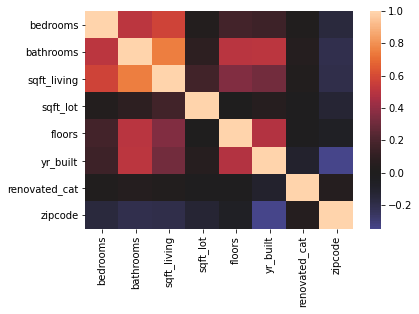

In [116]:
#sns heatmap to visually inspect possible correlations 
sns.heatmap(data_pred.corr(), center=0);

#### Transforming and Normalizing Continous Data

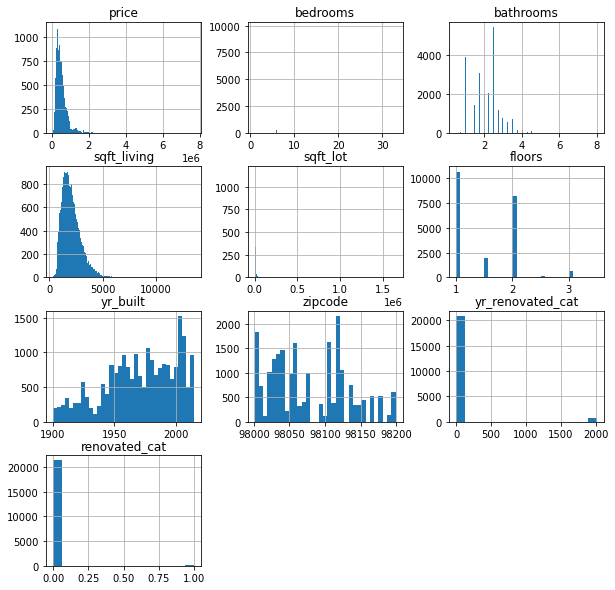

In [93]:
#using visualizations to determine if columns continuous or categorical
df.hist(figsize=[10, 10], bins='auto');

In [117]:
#only sqft_living, sqft_lt, and yr_built are continuous
#splitting columns into categorical or cont variables
cont = ['price', 'sqft_living', 'yr_built', 'sqft_lot']
categ = ['bedrooms', 'bathrooms', 'zipcode', 'floors', 'renovated_cat', 'grade',
        'condition']

df['price'] = df['price']
df_cont = df[cont]
df_categ = df[categ]


In [130]:
df_categ.head()

,bedrooms,bathrooms,zipcode,floors,renovated_cat,grade,condition
0,3,1.00,98178,1.0,0,7 Average,Average
1,3,2.25,98125,2.0,0,7 Average,Average
2,2,1.00,98028,1.0,0,6 Low Average,Average
3,4,3.00,98136,1.0,0,7 Average,Very Good
4,3,2.00,98074,1.0,0,8 Good,Average


In [110]:
#log transforming and standardizing continuous data
df_cont_log = np.log(df_cont)

def normalizer(series):
    return (series-series.mean())/series.std()

df_cont_norm = df_cont_log.apply(normalizer)

#### Cleaning up Categorical Data

In [129]:
df_categ['grade'].value_counts(ascending=True)

3 Poor              1
13 Mansion         13
4 Low              27
12 Luxury          89
5 Fair            242
11 Excellent      399
10 Very Good     1134
6 Low Average    2038
9 Better         2615
8 Good           6065
7 Average        8974
Name: grade, dtype: int64

#### One-Hot Encoding Categorical Data

In [131]:
categ_dummies = pd.get_dummies(df_categ, drop_first=True)

#### Combining Features for Preproccessed Dataframe


In [132]:
preprocessed = pd.concat([df_cont_norm, categ_dummies], axis=1)

In [134]:
preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                21597 non-null  float64
 1   sqft_living          21597 non-null  float64
 2   yr_built             21597 non-null  float64
 3   sqft_lot             21597 non-null  float64
 4   bedrooms             21597 non-null  int64  
 5   bathrooms            21597 non-null  float64
 6   zipcode              21597 non-null  int64  
 7   floors               21597 non-null  float64
 8   renovated_cat        21597 non-null  int64  
 9   grade_11 Excellent   21597 non-null  uint8  
 10  grade_12 Luxury      21597 non-null  uint8  
 11  grade_13 Mansion     21597 non-null  uint8  
 12  grade_3 Poor         21597 non-null  uint8  
 13  grade_4 Low          21597 non-null  uint8  
 14  grade_5 Fair         21597 non-null  uint8  
 15  grade_6 Low Average  21597 non-null 

## Data Modeling and Evaluation

## Conclusions

## Next Steps

* **Author:** Kevin Culver
* **Student pace:** self paced
* **Scheduled project review date/time:**  TBD
* **Instructor name:**  Abhineet Kulkarni
* **Blog post URL:** TBD